## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  16.121352   699.308851  0.683926   8.457213   478.653199
1  60.776942   981.212738  0.379971   2.650005   377.893823
2  12.313667  1357.923280  0.710239   9.362183   964.539130
3  59.627021   280.646460  0.947700   3.447063   272.712381
4  58.589702  1742.992022  0.580831  10.562428  1014.045781


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0509047	total: 57.5ms	remaining: 57.4s
1:	learn: 1.0399533	total: 58ms	remaining: 29s
2:	learn: 1.0303228	total: 58.6ms	remaining: 19.5s
3:	learn: 1.0184259	total: 59.1ms	remaining: 14.7s
4:	learn: 1.0055093	total: 59.6ms	remaining: 11.9s
5:	learn: 0.9951849	total: 60ms	remaining: 9.94s
6:	learn: 0.9825069	total: 60.6ms	remaining: 8.59s
7:	learn: 0.9694279	total: 61ms	remaining: 7.56s
8:	learn: 0.9561600	total: 61.5ms	remaining: 6.77s
9:	learn: 0.9427725	total: 61.9ms	remaining: 6.13s
10:	learn: 0.9300443	total: 62.4ms	remaining: 5.61s
11:	learn: 0.9160629	total: 62.7ms	remaining: 5.16s
12:	learn: 0.9040761	total: 63.1ms	remaining: 4.79s
13:	learn: 0.8908675	total: 63.5ms	remaining: 4.47s
14:	learn: 0.8806753	total: 63.9ms	remaining: 4.2s
15:	learn: 0.8706890	total: 64.4ms	remaining: 3.96s
16:	learn: 0.8583992	total: 65ms	remaining: 3.76s
17:	learn: 0.8487868	total: 65.5ms	remaining: 3.57s
18:	learn: 0.8399033	total: 65.8ms	remaining: 3.4s
19:	

106:	learn: 0.3004758	total: 106ms	remaining: 887ms
107:	learn: 0.2973963	total: 107ms	remaining: 882ms
108:	learn: 0.2940582	total: 107ms	remaining: 876ms
109:	learn: 0.2915064	total: 108ms	remaining: 871ms
110:	learn: 0.2882218	total: 108ms	remaining: 866ms
111:	learn: 0.2845181	total: 109ms	remaining: 861ms
112:	learn: 0.2815727	total: 109ms	remaining: 856ms
113:	learn: 0.2790152	total: 110ms	remaining: 852ms
114:	learn: 0.2754162	total: 110ms	remaining: 847ms
115:	learn: 0.2724660	total: 111ms	remaining: 843ms
116:	learn: 0.2693974	total: 111ms	remaining: 839ms
117:	learn: 0.2664794	total: 112ms	remaining: 835ms
118:	learn: 0.2639954	total: 112ms	remaining: 830ms
119:	learn: 0.2606734	total: 113ms	remaining: 825ms
120:	learn: 0.2577149	total: 113ms	remaining: 822ms
121:	learn: 0.2543174	total: 114ms	remaining: 818ms
122:	learn: 0.2521326	total: 114ms	remaining: 814ms
123:	learn: 0.2495448	total: 115ms	remaining: 811ms
124:	learn: 0.2475490	total: 115ms	remaining: 808ms
125:	learn: 

283:	learn: 0.0676450	total: 184ms	remaining: 464ms
284:	learn: 0.0671141	total: 184ms	remaining: 463ms
285:	learn: 0.0667118	total: 185ms	remaining: 462ms
286:	learn: 0.0661767	total: 185ms	remaining: 461ms
287:	learn: 0.0656883	total: 186ms	remaining: 459ms
288:	learn: 0.0654498	total: 186ms	remaining: 458ms
289:	learn: 0.0649489	total: 187ms	remaining: 457ms
290:	learn: 0.0647105	total: 187ms	remaining: 456ms
291:	learn: 0.0642196	total: 187ms	remaining: 454ms
292:	learn: 0.0637687	total: 188ms	remaining: 453ms
293:	learn: 0.0635224	total: 188ms	remaining: 452ms
294:	learn: 0.0631710	total: 189ms	remaining: 451ms
295:	learn: 0.0626857	total: 189ms	remaining: 449ms
296:	learn: 0.0624248	total: 189ms	remaining: 448ms
297:	learn: 0.0622131	total: 190ms	remaining: 447ms
298:	learn: 0.0620096	total: 190ms	remaining: 446ms
299:	learn: 0.0617835	total: 190ms	remaining: 444ms
300:	learn: 0.0615695	total: 191ms	remaining: 443ms
301:	learn: 0.0613304	total: 191ms	remaining: 442ms
302:	learn: 

528:	learn: 0.0268690	total: 284ms	remaining: 253ms
529:	learn: 0.0267472	total: 285ms	remaining: 253ms
530:	learn: 0.0266242	total: 285ms	remaining: 252ms
531:	learn: 0.0265262	total: 286ms	remaining: 251ms
532:	learn: 0.0264615	total: 286ms	remaining: 251ms
533:	learn: 0.0263976	total: 286ms	remaining: 250ms
534:	learn: 0.0262782	total: 287ms	remaining: 249ms
535:	learn: 0.0261627	total: 287ms	remaining: 249ms
536:	learn: 0.0260592	total: 288ms	remaining: 248ms
537:	learn: 0.0260376	total: 288ms	remaining: 247ms
538:	learn: 0.0260163	total: 288ms	remaining: 247ms
539:	learn: 0.0259953	total: 289ms	remaining: 246ms
540:	learn: 0.0259746	total: 289ms	remaining: 245ms
541:	learn: 0.0259542	total: 290ms	remaining: 245ms
542:	learn: 0.0259341	total: 290ms	remaining: 244ms
543:	learn: 0.0259143	total: 291ms	remaining: 244ms
544:	learn: 0.0258966	total: 291ms	remaining: 243ms
545:	learn: 0.0258791	total: 292ms	remaining: 243ms
546:	learn: 0.0258618	total: 292ms	remaining: 242ms
547:	learn: 

703:	learn: 0.0139831	total: 362ms	remaining: 152ms
704:	learn: 0.0139382	total: 363ms	remaining: 152ms
705:	learn: 0.0138601	total: 363ms	remaining: 151ms
706:	learn: 0.0137833	total: 363ms	remaining: 151ms
707:	learn: 0.0137370	total: 364ms	remaining: 150ms
708:	learn: 0.0136970	total: 364ms	remaining: 149ms
709:	learn: 0.0136390	total: 365ms	remaining: 149ms
710:	learn: 0.0136002	total: 365ms	remaining: 148ms
711:	learn: 0.0135574	total: 366ms	remaining: 148ms
712:	learn: 0.0135014	total: 366ms	remaining: 147ms
713:	learn: 0.0134268	total: 367ms	remaining: 147ms
714:	learn: 0.0133826	total: 367ms	remaining: 146ms
715:	learn: 0.0133445	total: 367ms	remaining: 146ms
716:	learn: 0.0133148	total: 368ms	remaining: 145ms
717:	learn: 0.0132719	total: 368ms	remaining: 145ms
718:	learn: 0.0132347	total: 369ms	remaining: 144ms
719:	learn: 0.0131770	total: 369ms	remaining: 144ms
720:	learn: 0.0131205	total: 370ms	remaining: 143ms
721:	learn: 0.0130484	total: 370ms	remaining: 143ms
722:	learn: 

913:	learn: 0.0077090	total: 462ms	remaining: 43.5ms
914:	learn: 0.0076996	total: 462ms	remaining: 43ms
915:	learn: 0.0076878	total: 463ms	remaining: 42.5ms
916:	learn: 0.0076591	total: 464ms	remaining: 42ms
917:	learn: 0.0076498	total: 464ms	remaining: 41.5ms
918:	learn: 0.0076297	total: 465ms	remaining: 40.9ms
919:	learn: 0.0076009	total: 465ms	remaining: 40.4ms
920:	learn: 0.0075785	total: 466ms	remaining: 39.9ms
921:	learn: 0.0075703	total: 466ms	remaining: 39.4ms
922:	learn: 0.0075614	total: 467ms	remaining: 38.9ms
923:	learn: 0.0075337	total: 467ms	remaining: 38.4ms
924:	learn: 0.0075258	total: 468ms	remaining: 37.9ms
925:	learn: 0.0075171	total: 468ms	remaining: 37.4ms
926:	learn: 0.0074889	total: 469ms	remaining: 36.9ms
927:	learn: 0.0074596	total: 469ms	remaining: 36.4ms
928:	learn: 0.0074358	total: 470ms	remaining: 35.9ms
929:	learn: 0.0074281	total: 470ms	remaining: 35.4ms
930:	learn: 0.0074011	total: 471ms	remaining: 34.9ms
931:	learn: 0.0073779	total: 471ms	remaining: 34.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


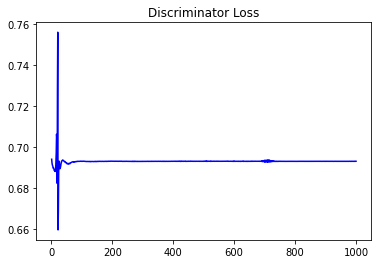

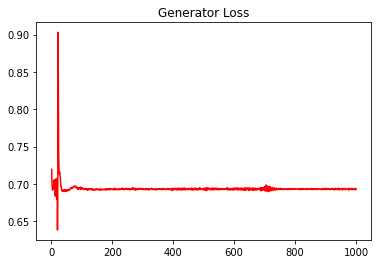

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.011827580428238796


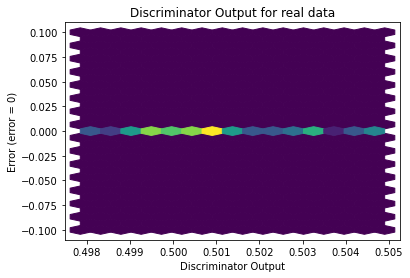

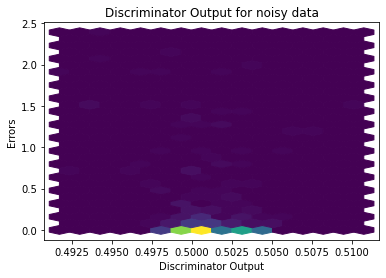

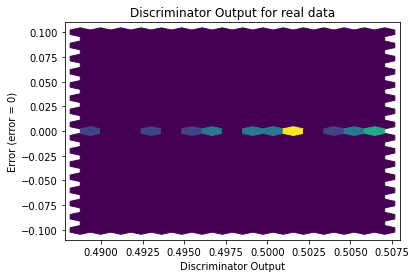

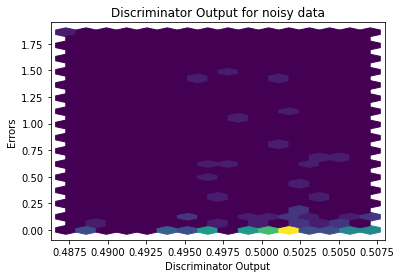

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3354]], requires_grad=True)
